In [4]:
import os
os.getcwd()

#permission to access drive of linked account
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#uploading the dataset zip file to google colab drive
from google.colab import files
files.upload()

!unzip titanic.zip

Mounted at /content/gdrive


Saving titanic.zip to titanic (1).zip
Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: gender_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

k-nearset algorithm is broken into 3 steps

1. Calculate Euclidean Distance
2. Get Nearest Neighbors
3. Make Predictions

In [24]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

PassengerId = 1-891 : Train(891), 892 - 1309 : test (418 rows)


In [25]:
y_train = train['Survived'] # target
train.drop(['Survived'], axis=1, inplace=True)
train = pd.concat([train,test])
train.index = list(range(0,train.shape[0]))

In [26]:
train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [28]:
# Drop Cabin as it has large no. of values missing 
#Embarked as we will not be using it because if we convert those categores into numbers it would not make any sense.
train.drop(['Cabin', 'Embarked'],axis=1, inplace=True)

In [29]:
train.shape

(1309, 9)

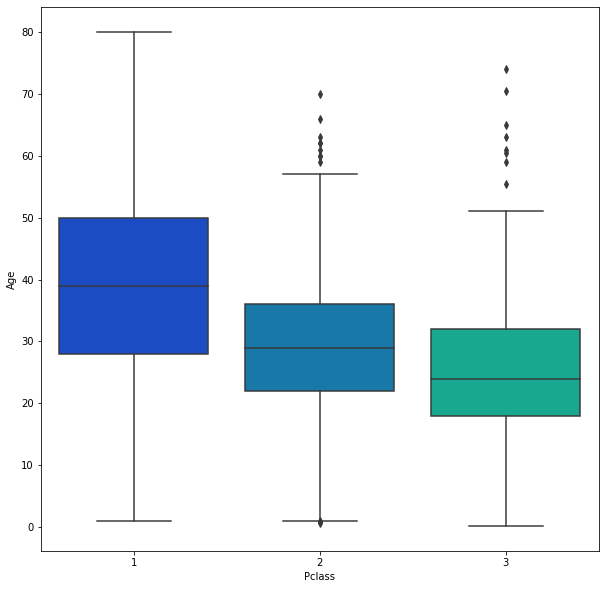

In [30]:
# from boxplot below between age and Pclass attribute we can observe at for different Pclass age mean is differnt
# hence we will replace the missing values in 'Age' with the mean of respective class
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

In [31]:
#Finding the mean value of each class
train.groupby('Pclass')['Age'].mean()

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [32]:
#Replacing the nan values in age column
def replacena_age(columns):
  Age = columns[0]
  Pclass = columns[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 39
    elif Pclass == 2:
      return 30
    else:
      return 25
  else:
    return Age

In [33]:
train['Age'] = train[['Age','Pclass']].apply(replacena_age, axis=1)

In [34]:
train['Fare'].fillna(train['Fare'].mean(), inplace=True)

In [35]:
train.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

Here,

SibSp: Sibling Sprouse

Parch : Parent child

In [ ]:
for ix, row in train.iterrows():
  print(ix)
  print(row)
  print("-------------")

In [ ]:
for ix, row in train.iteritems():
  print(ix)
  print(row)
  print("-------------")

In [38]:
# Getting family size from Prach and Sibsp

train['family_size'] = train['Parch'] + train['SibSp']

KNN needs numerical features therefore, we will convert them to numbers.

In general sense, binary categorical data can work

For larger categorical groups, it only makes sense when the numerical values itself haev meaning. 

For example, for class levels, the difference between first class and third class actually mean something.

on the other hand, if we convert Embarked to a number, there is no meaning in the difference between embarked1 and embarked2

In [39]:
#appling Label Encoding 
sex_dic = {'female':0, 'male':1}
train['Sex'] = train['Sex'].map(sex_dic)

In [40]:
#appling Label Encoding 
train.loc[:,'Age'] = pd.qcut(train['Age'], 4, labels=False)
train.loc[:,'Fare'] = pd.qcut(train['Fare'], 5, labels=False)

In [41]:


#dropping unrequired columns
train.drop(['Name','SibSp','Parch', 'Ticket'], axis=1, inplace=True)

In [42]:
attributes = ['Pclass', 'Sex', 'Age', 'Fare', 'family_size']

In [43]:
for fea in attributes:
  print(fea)
  lis = train[fea].unique()
  print(lis)
  print("--------")

Pclass
[3 1 2]
--------
Sex
[1 0]
--------
Age
[0 3 1 2]
--------
Fare
[0 4 1 2 3]
--------
family_size
[ 1  0  4  2  6  5  3  7 10]
--------


**STANDARDIZE THE DATASET**

1. Normalize Data

We use normalization to refer to rescaling an input varibale to range between 0 and 1. 

Normalizatio requires that you know the minimum and maximum values for each attribute

2. Standardize Data

Standardization is a rescaling technique that refers to centering the distribution of the data on the value 0 and the standard deviation to the value 1. 

Together 


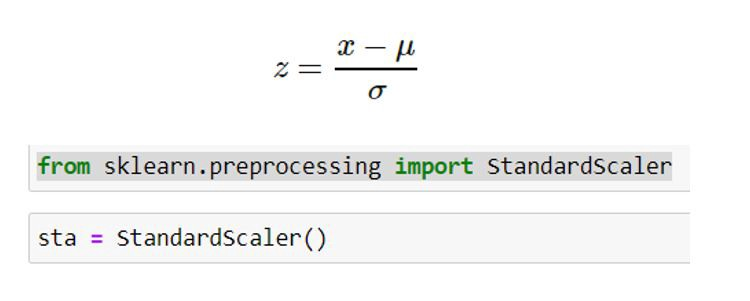

In [44]:
def StandardScaler(train,attributes):
  mean=[]
  std = []
  #calculating the mean and standard deviation of each column
  for fea in attributes:
    mean.append(np.mean(train[fea]))
    std.append(np.std(train[fea]))

  #appling StandardScaler on each element of every column
  for i in range(len(attributes)):
    lis = []
    for x in train[attributes[i]]:
       lis.append((x-mean[i])/std[i])
    train[attributes[i]] = lis
    print(attributes[i] ," : ",train[attributes[i]].unique())
    
  return train

train = StandardScaler(train,attributes)

Pclass  :  [ 0.84191642 -1.54609786 -0.35209072]
Sex  :  [ 0.74349692 -1.34499549]
Age  :  [-1.31648546  1.37193804 -0.42034429  0.47579688]
Fare  :  [-1.39261797  1.41730407 -0.69013746  0.01234305  0.71482356]
family_size  :  [ 0.07335229 -0.55834605  1.96844733  0.70505064  3.23184402  2.60014567
  1.33674898  3.86354236  5.7586374 ]


In [45]:
#Splitting the data into train and test after data processing
test = train.loc[891:1309]
test.index = list(range(test.shape[0]))
train = train.loc[0:890]
train.index = list(range(train.shape[0]))


In [46]:
train

,PassengerId,Pclass,Sex,Age,Fare,family_size
0,1,0.841916,0.743497,-1.316485,-1.392618,0.073352
1,2,-1.546098,-1.344995,1.371938,1.417304,0.073352
2,3,0.841916,-1.344995,-0.420344,-0.690137,-0.558346
3,4,-1.546098,-1.344995,0.475797,1.417304,0.073352
4,5,0.841916,0.743497,0.475797,-0.690137,-0.558346
...,...,...,...,...,...,...
886,887,-0.352091,0.743497,0.475797,0.012343,-0.558346
887,888,-1.546098,-1.344995,-1.316485,0.714824,-0.558346
888,889,0.841916,-1.344995,-0.420344,0.714824,1.336749
889,890,-1.546098,0.743497,-0.420344,0.714824,-0.558346


In [47]:
test

,PassengerId,Pclass,Sex,Age,Fare,family_size
0,892,0.841916,0.743497,0.475797,-1.392618,-0.558346
1,893,0.841916,-1.344995,1.371938,-1.392618,0.073352
2,894,-0.352091,0.743497,1.371938,-0.690137,-0.558346
3,895,0.841916,0.743497,0.475797,-0.690137,-0.558346
4,896,0.841916,-1.344995,-1.316485,0.012343,0.705051
...,...,...,...,...,...,...
413,1305,0.841916,0.743497,-0.420344,-0.690137,-0.558346
414,1306,-1.546098,-1.344995,1.371938,1.417304,-0.558346
415,1307,0.841916,0.743497,1.371938,-1.392618,-0.558346
416,1308,0.841916,0.743497,-0.420344,-0.690137,-0.558346


In [48]:
train.drop(['PassengerId'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [49]:
print(train.shape,test.shape)

(891, 5) (418, 5)


In [50]:
y_train.to_frame()

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [51]:
train['Survived'] = y_train
#.loc[row_indexer,col_indexer] = value

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
# x1 : first row, x2 : second row
# value zero means there is no difference between two records
def euclidena_dist (x1,x2):
  dis = 0.0
  # Alternative np.sum()
  for i in range(len(x1)):
    dis = dis + (x1[i] - x2[i] )**2
  return np.sqrt(dis)

Using our distance function we will now find the closest match in our dataset when providing a vector.

In [53]:
def k_nearest_neighbor_list(test_case, train, nearest_neighbor=1, ignore_col = ['Survived']):

  distances = []
  for ix,row in train.loc[:,~train.columns.isin(ignore_col)].iterrows():
  
      #calculating the euclidean distance
      dist = euclidena_dist (test_case,row) 
      distances.append((dist,ix)) 
  
  #storing the index of distances in ascending order of distance
  indices = [i[1] for i in sorted(distances, key= lambda i : i[0])] 
  
  neighbors = train.loc[indices[:nearest_neighbor]]
  
  return neighbors

# Function to return the dominat class among the K nearest neighbor Dataset returned
def predict_result(test_case_series, train, nearest_neighbor=1, y='Survived'):
    
    neighbors = k_nearest_neighbor_list(test_case_series, train, nearest_neighbor)
    res = 1 if neighbors[neighbors[y] == 1].count()[0] > neighbors[neighbors[y] == 0].count()[0] else 0
    return res

def accuracy_cal(actual, pred):
  count = 0 
  for i in list(range(len(actual))):
    if actual['Survived'][i] == pred['Survived'][i] :
        count = count + 1
  return count/float(len(actual))*100


                                                  

In [57]:
actual_val = pd.read_csv('gender_submission.csv') 
lis = {} 

In [ ]:
#calculating accuracy from 1 to 50
for i in list(range(1,50)):
  val = []
  k=i
  for ind,row in test.iterrows():
    val.append(predict_result(row,train,k))
  pred_val = pd.DataFrame(val,columns=['Survived'])
  acc=accuracy_cal(actual_val,pred_val)
  print("Accuracy is : ",i," : ",acc )
  lis[i]=acc

In [60]:
  val = []
  k=10
  for ind,row in test.iterrows():
    val.append(predict_result(row,train,k))
  pred_val = pd.DataFrame(val,columns=['Survived'])
  print("Accuracy is : " , accuracy_cal(actual_val,pred_val))

Accuracy is :  87.32057416267942


In [ ]:
#calculating accuracy from 50 to 100
for i in list(range(50,100)):
  val = []
  k=i
  for ind,row in test.iterrows():
    val.append(predict_result(row,train,k))
  pred_val = pd.DataFrame(val,columns=['Survived'])
  acc=accuracy_cal(actual_val,pred_val)
  print("Accuracy is : ",i," : ",acc )
  lis[i]=acc

In [137]:
lis

[(1, 82.05741626794259),
 (2, 83.01435406698565),
 (3, 83.97129186602871),
 (4, 89.71291866028707),
 (5, 89.47368421052632),
 (6, 88.51674641148325),
 (7, 88.99521531100478),
 (8, 86.36363636363636),
 (9, 87.5598086124402),
 (10, 87.32057416267942),
 (11, 88.51674641148325),
 (12, 88.75598086124403),
 (13, 91.14832535885168),
 (14, 89.71291866028707),
 (15, 90.9090909090909),
 (16, 90.19138755980862),
 (17, 89.95215311004785),
 (18, 88.51674641148325),
 (19, 91.86602870813397),
 (20, 91.38755980861244),
 (21, 92.10526315789474),
 (22, 91.14832535885168),
 (23, 91.86602870813397),
 (24, 94.01913875598086),
 (25, 94.49760765550239),
 (26, 94.25837320574163),
 (27, 95.69377990430623),
 (28, 96.41148325358851),
 (29, 96.88995215311004),
 (30, 95.93301435406698),
 (31, 94.73684210526315),
 (32, 96.88995215311004),
 (33, 96.65071770334929),
 (34, 96.88995215311004),
 (35, 96.88995215311004),
 (36, 97.60765550239235),
 (37, 98.08612440191388),
 (38, 98.08612440191388),
 (39, 97.84688995215312

**Maximum accuracy : 98.8 at k=48**

In [123]:
lis = sorted(lis.items(), key = lambda x:x[0])

In [141]:
#extracting values and convering into individal list
x = list(list(zip(*lis))[0])
y = list(list(zip(*lis))[1])

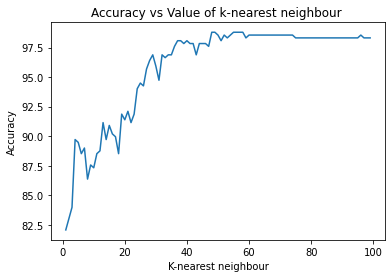

In [143]:
plt.title('Accuracy vs Value of k-nearest neighbour ')
plt.plot(x, y)
plt.xlabel('K-nearest neighbour')
plt.ylabel('Accuracy')
plt.show()